# Radial Profile

#### Generate ejecta thickness histogram with radial distance and depth bins

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tools
import pandas as pd
import seaborn as sns


In [71]:
df = pd.read_csv('csv_files/full_tracer_v10hot.csv')

In [72]:
def haversine_moon(lat1, long1, lat2, long2):

    """
    Calculates the great circle distance between two points on the moon. Also calculates the bearing from point 1 to point 2.
    Takes the input starting and ending lat, lons in degrees.

    """
    lat1 = np.deg2rad(lat1)
    long1 = np.deg2rad(long1)
    lat2 = np.deg2rad(lat2)
    long2 = np.deg2rad(long2)
    t1 = np.square(np.sin((lat2 - lat1)/2))
    t2 = np.square(np.sin((lat2 + lat1)/2))
    t3 = np.square(np.sin((long2 - long1)/2))

    t = np.sqrt(t1 + (1 - t1 - t2) * t3)
    
    radial_distance = 2 * 1750 * np.arcsin(t)
    num = (np.cos(lat2)* np.sin(long2 -long1))
    denom = (np.cos(lat1)* np.sin(lat2)) - (np.sin(lat1)*np.cos(lat2)* np.cos(long2-long1))
    bearing = np.arctan(num/denom)
    bearing_deg = np.rad2deg(bearing)

    return radial_distance, bearing_deg

In [73]:
center_lat = np.array([-78])
center_long = np.array([0])
landing_lats = np.array(df['Landing Latitude'])
landing_longs = np.array(df['Landing Longitude'])

In [74]:

radial_distance, bearing = haversine_moon(center_lat, center_long, landing_lats, landing_longs)

df['Radial Distance'] = radial_distance.tolist()
df['Bearing'] = bearing.tolist()

df

,Tracer Index,Ejection Time,Resultant Velocity,Launch Longitude,Launch Latitude,Launch Angle,Height,Distance,Landing Longitude,Landing Latitude,Tracer Material,Azimuth,Depth,Pressure,Volume,Radial Distance,Bearing
0,1,314.022797,0.679284,178.594896,64.980646,67.284500,158.805465,307.947670,-2.463628,-54.911890,3.0,176.522308,-83.204904,9.840282e+10,125.000000,705.679002,-3.610252
1,4,540.002380,0.320635,177.521154,60.990997,35.253147,12.882374,284.626869,-3.203078,-51.680690,3.0,177.225807,-68.095904,1.072846e+11,125.000000,804.672133,-4.477521
2,5,398.019287,1.188337,178.043452,63.326922,34.335207,287.041130,1627.917677,-2.546014,-10.029844,4.0,179.276017,-73.086451,1.042551e+11,125.000000,2076.411803,-2.704443
3,6,314.022797,0.679284,178.676098,64.981388,67.283759,158.803879,307.956582,-2.382468,-54.912340,4.0,176.522308,-78.077004,1.010291e+11,125.000000,705.633351,-3.491412
4,7,314.022797,0.679284,178.594896,64.980646,67.284500,158.805465,307.947670,-2.463628,-54.911890,4.0,176.522308,-83.067569,9.840282e+10,125.000000,705.679002,-3.610252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32931,524221,618.024414,0.046177,169.891817,60.865682,33.373780,0.234922,229.139978,-10.108183,-53.363537,2.0,180.000000,105.000802,5.336313e+10,143.782851,760.522156,-14.403482
32932,524250,484.032013,0.629364,174.946318,61.939530,38.507867,63.539719,497.107018,-7.922620,-45.748348,2.0,172.840994,105.006904,4.810023e+10,71.860591,989.602622,-10.340877
32933,524251,610.093994,0.216113,169.806314,60.883449,29.912509,4.292756,290.504755,-14.558685,-51.680588,2.0,163.405773,104.999686,5.298057e+10,143.777123,820.067632,-20.187678
32934,524280,482.013000,0.619038,174.794305,61.984149,30.629730,41.433450,526.915853,-7.572901,-44.787736,2.0,174.327310,105.006060,4.796582e+10,71.894334,1018.515460,-9.796592


In [75]:
def filtered_df(dataframe):
    '''
    takes a dataframe as input and filters by given azimuth range degrees.
    '''
    
    df_filter = df[df['Bearing'].between(80, 90)]
    
    return df_filter
final_df = filtered_df(df)

final_df

,Tracer Index,Ejection Time,Resultant Velocity,Launch Longitude,Launch Latitude,Launch Angle,Height,Distance,Landing Longitude,Landing Latitude,Tracer Material,Azimuth,Depth,Pressure,Volume,Radial Distance,Bearing
723,4596,94.020691,2.191159,152.792571,75.255580,36.288496,20462.735996,3914.067665,-106.730221,42.382899,3.0,112.540130,-64.153012,8.663626e+10,125.000000,4114.586133,84.522158
867,5404,266.067200,0.411561,134.460646,72.822683,62.607972,50.558480,179.783922,-62.635697,-70.398991,3.0,105.917947,-28.746949,9.812364e+10,125.000000,535.624353,81.404014
987,5851,200.001801,0.343610,135.154961,74.200911,72.905816,40.230361,94.589281,-53.100984,-72.218183,3.0,125.735522,-43.727647,9.198187e+10,125.000000,433.034148,85.638711
993,5879,196.034195,0.218282,135.802552,74.205168,89.063727,17.489871,3.584261,-44.621460,-74.226817,3.0,79.164929,-38.891996,8.890065e+10,125.000000,336.754392,86.752961
1000,5909,196.034195,0.218342,136.015857,74.147403,89.068828,17.499695,3.565355,-44.403068,-74.170850,3.0,78.211344,-54.080260,8.287261e+10,125.000000,336.475525,87.177462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31678,632909,530.007812,0.345763,133.241494,66.666420,29.027180,10.670692,346.783052,-69.249221,-60.964203,1.0,109.421683,5.007309,1.943862e+09,1121.941570,824.832226,88.286826
31687,632939,540.002380,0.349475,133.676266,66.432359,29.336181,11.122397,345.594977,-68.110859,-60.492270,1.0,111.290604,5.025303,1.519934e+09,1121.947644,830.651184,89.833164
31705,632998,570.067078,0.314725,134.502847,65.905418,23.223289,5.806027,403.541239,-70.063468,-58.931356,1.0,110.161536,5.026297,1.809446e+09,1121.933271,886.483824,89.295583
31714,633028,584.026428,0.323818,134.933017,65.650047,16.816615,3.320764,540.175190,-74.803023,-55.278909,1.0,111.571421,4.988647,1.158045e+09,1122.004800,1019.609247,87.412153


In [76]:
volume = np.array(final_df['Volume'])
depth = np.array(final_df["Depth"])
rad_dist = np.array(final_df['Radial Distance'])

In [8]:
#create the histogram with radial distance and depth bins

# depth_bins = np.arange(0, depth.max(), 5)
# print(depth_bins.shape)
# bins = np.arange(0, rad_dist.max()+100, 200)

# H = np.histogram(rad_dist, bins = bins, weights = volume) 

# mid_rad = bins + 50 #midpoint of bin
# surface_area = np.pi / 18 * mid_rad[:-1] * 100 
# thickness_vals = H[0] / surface_area #layer thickness
# f, ax = plt.subplots(figsize=(18, 12))

# sns.barplot(x = bins[:-1], y= thickness_vals )

# plt.savefig('Figures/radial_plot_45_bearing.png', facecolor = 'white')


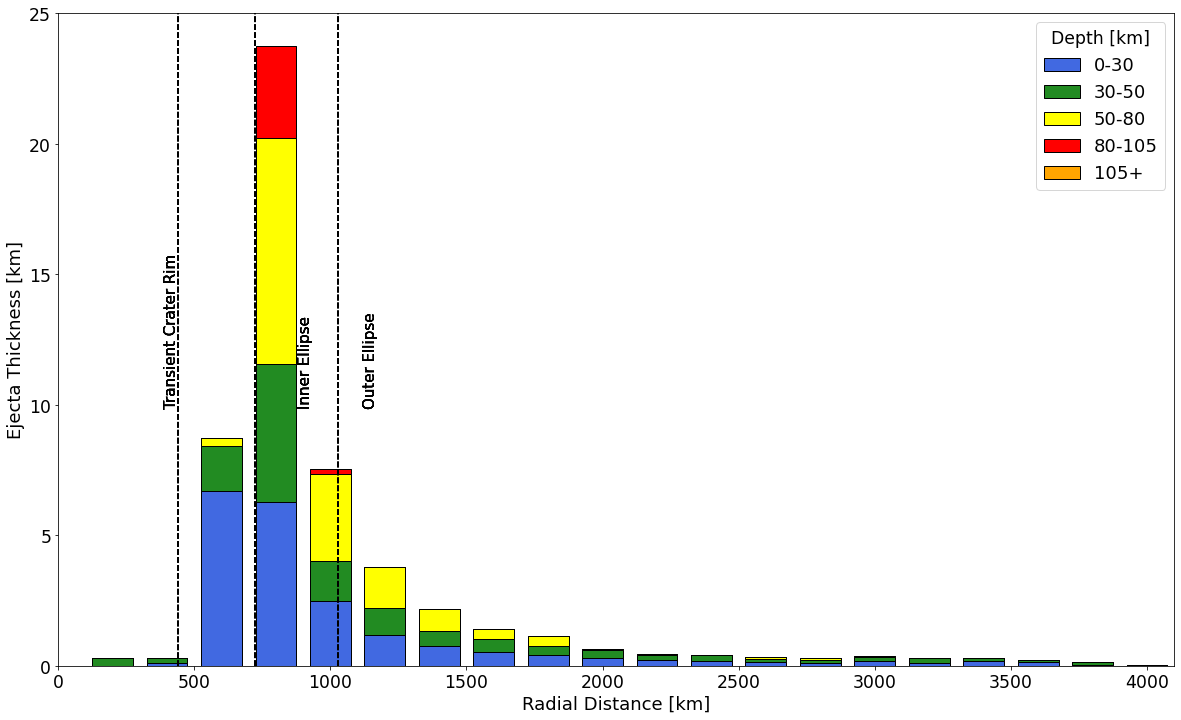

In [78]:
bins = np.arange(0, rad_dist.max()+100, 200)
depth_bins = [0, 30, 50, 80, 105, 200]

H = np.histogram2d(rad_dist, depth, bins = (bins, depth_bins), weights = volume) 
# print(H[0].shape)
mid_rad = bins + 50 #midpoint of bin
surface_area = np.pi / 18 * mid_rad[:-1] * 100 
thickness_vals = H[0] / surface_area[:, None] #layer thickness
f, ax = plt.subplots(figsize=(20, 12))

# summed = np.sum(thickness_vals, axis=1)
labels = ['0-30', '30-50', '50-80', '80-105', '105+']
colors = ['royalblue', 'forestgreen', 'yellow', 'r', 'orange']
for i in range(thickness_vals.shape[1]):
    bottom = np.zeros(thickness_vals.shape[0])
    for j in range(i):
        bottom += thickness_vals[:, j]
    plt.rcParams['legend.title_fontsize'] = 'xx-large'
    plt.rcParams['xtick.labelsize'] = 'xx-large'
    plt.rcParams['ytick.labelsize'] = 'xx-large'
    ax.bar(bins[:-1], thickness_vals[:, i], bottom=bottom, color=colors[i], width=150, label=labels[i],edgecolor= 'k')
    
#     rrange = np.arange(0, 3000, 50, dtype = float) +1e-12
#     ejfit = 7.712e12 * rrange**(-4) #from melosh 2017
#     ax.plot(rrange, ejfit, 'k--',zorder = 2)
    
    #ax.annotate('Data fit line from $\it{Melosh}$ $\it{et}$ $\it{al}$,(2017)', xy=(1170, 4), xytext=(1270, 4), arrowprops=dict(facecolor='black',arrowstyle="->"), fontsize = 15)
    ax.axvline(1029,c = 'k', linestyle= '--') #outer ellipse
    ax.annotate('Outer Ellipse', (1120, 10), fontsize = 15, rotation = 90)
    ax.axvline(722,c = 'k', linestyle= '--') #inner ellipse
    ax.annotate('Inner Ellipse', (880, 10), fontsize = 15, rotation = 90)
    ax.axvline(440,c = 'k', linestyle= '--') #transient crater rim
    ax.annotate('Transient Crater Rim', (390, 10), fontsize = 15, rotation = 90)
    ax.legend(title = 'Depth [km]',fontsize = 18)
    ax.set_xlim(0, 4100, 100)
    ax.set_ylim(0, 25, 5)
    ax.set_xlabel('Radial Distance [km]', fontsize = 18)
    ax.set_ylabel('Ejecta Thickness [km]', fontsize = 18)
    


plt.savefig('Figures/radial_plot_85_bearing_v10.png', facecolor = 'white', dpi =600)

In [65]:
#calculate the radial distances of the outer ellipse

a= 1200       # semimajor axis
b= 1028      #semiminor axis
ang = np.deg2rad(85)
x = a * np.cos(ang)
y = b * np.sin(ang)
r = np.sqrt(x**2 + y**2)
print(r)

1029.4148610064055


In [66]:
#calculate the radial distances of the inner ellipse

a= 970       # semimajor axis
b= 720       #semiminor axis
ang = np.deg2rad(85)
x = a * np.cos(ang)
y = b * np.sin(ang)
r = np.sqrt(x**2 + y**2)
print(r)

722.2252849188895


In [67]:
#calculate the radial distances of the transient crater 

a= 500         # semimajor axis
b= 440        #semiminor axis
ang = np.deg2rad(85)
x = a * np.cos(ang)
y = b * np.sin(ang)
r = np.sqrt(x**2 + y**2)
print(r)

440.48657342200084
